In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fits = pd.read_excel('fits.xlsx')

In [3]:
#fits dataframe before adjusments
fits

,Sex,Shipment,Last 5,Coat Color,Shipping Box,Housing box,Order in box,Squad #,Box Color,Operant Box,...,Exponential-Adj. R2 (recoded),Exponential-AIC,Quadratic-k,Quadratic-R2,Quadratic-Adj. R2 (recoded),Quadratic-AIC,Linear-k,Linear-R2,Linear-Adj. R2 (recoded),Linear-AIC
0,M,2,45751,BRN HOOD,5,40,2,4,BLUE,8,...,0.725429,36.342187,0.272698,-1.349954,0.000000,50.562703,6.678471,-0.035885,0.000000,45.647864
1,F,2,45756,BLACK,11,54,2,5,BLUE,12,...,0.000000,42.756235,0.259993,-5.508170,0.000000,50.962255,6.338652,-2.516639,0.000000,47.268939
2,F,2,45757,BRN HOOD,11,18,2,2,BLUE,12,...,0.000000,42.401441,0.262557,-4.489528,0.000000,52.609082,6.564409,-2.148642,0.000000,49.273856
3,F,2,45759,BRN HOOD,10,52,2,5,BLUE,8,...,0.920194,32.324584,0.265759,0.378190,0.222737,45.981682,6.163581,0.814850,0.768562,38.712880
4,M,2,45760,BROWN,5,39,2,4,BLUE,6,...,0.879992,35.471797,0.247963,0.533578,0.416973,44.955831,5.690875,0.833890,0.792363,38.761188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,4,47963,BLK HOOD,1,12,2,1,RED,8,...,0.378722,39.455651,0.438252,0.506212,0.341616,39.745699,6.498826,0.554768,0.406358,39.228146
391,F,4,47964,BLK HOOD,6,34,1,3,RED,3,...,0.292852,44.912651,0.225828,0.333280,0.166600,45.898297,4.924056,0.460635,0.325794,44.626432
392,M,4,47968,BRN HOOD,1,27,1,3,BLUE,5,...,0.718459,40.902493,0.213945,0.611274,0.514093,44.176931,4.788950,0.761658,0.702073,41.241926
393,M,4,47973,BLACK,1,12,1,1,RED,7,...,0.897968,32.911002,0.222286,0.833993,0.792491,37.170351,4.822055,0.948307,0.935384,30.170114


In [4]:
#Rename Columns
fits.rename(columns={'Sex': 'sex', 'Shipment': 'cohort','Last 5': 'rfid', 'Coat Color': 'coat_color'
                     ,'Shipping Box': 'shipping_box', 'Housing box': 'housing_box',
                     'Order in box': 'order_in_box', 'Squad #': 'squad_num',
                    'Box Color': 'box_color', 'Operant Box': 'opertant_box','ID-Check': 'id_check',
                     'Subject#': 'subject_num','s or ns': 's_or_ns', 'Missing Indifference Point': 'missing_indiff_point',
                     'Missing Indiff-Count': 'missing_indiff_count', 'Indiff0': 'indiff_0','Indiff2': 'indiff_2',
                     'Indiff4': 'indiff_4','Indiff8': 'indiff_8', 'Indiff16': 'indiff_16','Indiff24': 'indiff_24',
                     'Hyperbolic-k': 'hyperbolic_k', 'Hyperbolic-ln(k)': 'hyperbolic_lnk',
                    'Hyperbolic-b': 'hyperbolic_b','Hyperbolic-R2': 'hyperbolic_R2',
                    'Hyperbolic-Adj. R2 (recoded)': 'hyperbolic_adj_R2','Hyperbolic-AIC': 'hyperbolic_AIC',
                     'AUC-traditional': 'AUC_traditional','AUC-normal0s': 'AUC_normal',
                     'Hyperboloid-k': 'hyperboloid_k','Hyperboloid-s': 'hyperboloid_s','Hyperboloid-R2': 'hyperboloid_R2',
                     'Hyperboloid-Adj. R2 (recoded)': 'hyperboloid_adj_R2','Hyperboloid-AIC': 'hyperboloid_AIC',
                    'Quasi-H-k [beta]': 'quasi_H_k_beta', 'Quasi-H-s [delta]': 'quasi_H_s_delta',
                     'Quasi-H-R2': 'quasi_H_R2', 'Quasi-H-Adj. R2 (recoded)': 'quasi_H_adj_R2',
                    'Quasi-H-AIC': 'quasi_H_AIC', 'Exponential-k': 'expon_k','Exponential-R2': 'expon_R2',
                     'Exponential-Adj. R2 (recoded)': 'expon_adj_R2','Exponential-AIC': 'expon_AIC','Quadratic-k': 'quad_k',
                    'Quadratic-R2': 'quad_R2','Quadratic-Adj. R2 (recoded)': 'quad_adj_R2','Quadratic-AIC': 'quad_AIC',
                    'Linear-k': 'linear_k','Linear-R2': 'linear_R2','Linear-Adj. R2 (recoded)': 'linear_adj_R2','Linear-AIC': 'linear_AIC',}, inplace=True)

In [5]:
#Make colors uniform
before_colors = fits.coat_color.unique()
#Black Hood
fits.replace(to_replace =["BLK HOOD", "BLACK HOOD","BLK HHOD"], 
                            value ="black_hood",inplace = True)
#Brown Hood
fits.replace(to_replace =["BRN HOOD", "BROWN HOOD"], 
                            value ="brown_hood",inplace = True)
#Black
fits.replace(to_replace =["BLACK"], 
                            value ="black",inplace = True)
#Brown
fits.replace(to_replace =["BROWN", "BROWN "], 
                            value ="brown",inplace = True)
#Albino
fits.replace(to_replace =["ALBINO"], 
                            value ="albino",inplace = True)
after_colors = fits.coat_color.unique()
print("Before Colors: ",before_colors)
print("After Colors: ",after_colors)


Before Colors:  ['BRN HOOD' 'BLACK' 'BROWN' 'BLK HOOD' 'ALBINO' 'BROWN HOOD' 'BLACK HOOD'
 'BROWN ' 'BLK HHOD']
After Colors:  ['brown_hood' 'black' 'brown' 'black_hood' 'albino']


In [6]:
#Change sex and box_color columns to lower case
fits['sex'] = fits['sex'].str.lower()
fits['box_color'] = fits['box_color'].str.lower()
#fits.box_color.unique()

In [7]:
#Change the last 5 numbers of RFID to include entire number
fits['rfid']= fits['rfid'].map(str)
fits['rfid'] = '9330003200' + fits['rfid'].astype(str)

In [8]:
#Change shipment values to be in the C0 cohort format
fits['cohort'] = 'C0' + fits['cohort'].astype(str)

In [9]:
#Fits dataframe with adjustments
fits

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,expon_adj_R2,expon_AIC,quad_k,quad_R2,quad_adj_R2,quad_AIC,linear_k,linear_R2,linear_adj_R2,linear_AIC
0,m,C02,933000320045751,brown_hood,5,40,2,4,blue,8,...,0.725429,36.342187,0.272698,-1.349954,0.000000,50.562703,6.678471,-0.035885,0.000000,45.647864
1,f,C02,933000320045756,black,11,54,2,5,blue,12,...,0.000000,42.756235,0.259993,-5.508170,0.000000,50.962255,6.338652,-2.516639,0.000000,47.268939
2,f,C02,933000320045757,brown_hood,11,18,2,2,blue,12,...,0.000000,42.401441,0.262557,-4.489528,0.000000,52.609082,6.564409,-2.148642,0.000000,49.273856
3,f,C02,933000320045759,brown_hood,10,52,2,5,blue,8,...,0.920194,32.324584,0.265759,0.378190,0.222737,45.981682,6.163581,0.814850,0.768562,38.712880
4,m,C02,933000320045760,brown,5,39,2,4,blue,6,...,0.879992,35.471797,0.247963,0.533578,0.416973,44.955831,5.690875,0.833890,0.792363,38.761188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,m,C04,933000320047963,black_hood,1,12,2,1,red,8,...,0.378722,39.455651,0.438252,0.506212,0.341616,39.745699,6.498826,0.554768,0.406358,39.228146
391,f,C04,933000320047964,black_hood,6,34,1,3,red,3,...,0.292852,44.912651,0.225828,0.333280,0.166600,45.898297,4.924056,0.460635,0.325794,44.626432
392,m,C04,933000320047968,brown_hood,1,27,1,3,blue,5,...,0.718459,40.902493,0.213945,0.611274,0.514093,44.176931,4.788950,0.761658,0.702073,41.241926
393,m,C04,933000320047973,black,1,12,1,1,red,7,...,0.897968,32.911002,0.222286,0.833993,0.792491,37.170351,4.822055,0.948307,0.935384,30.170114


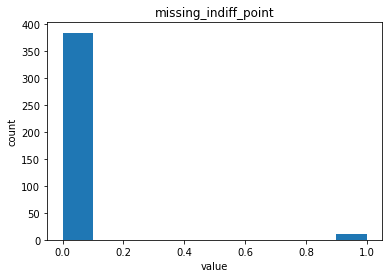

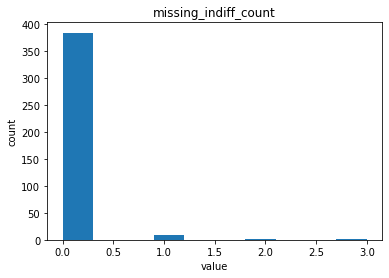

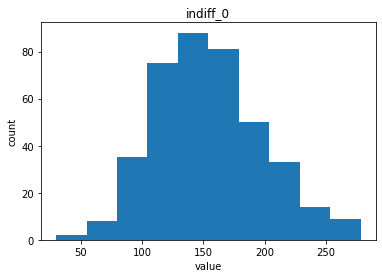

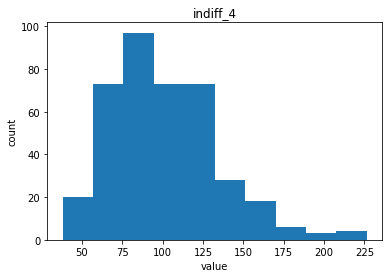

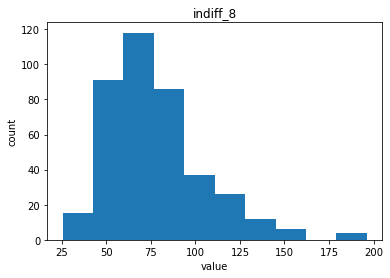

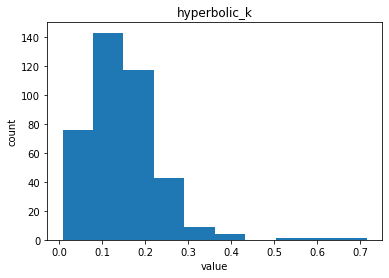

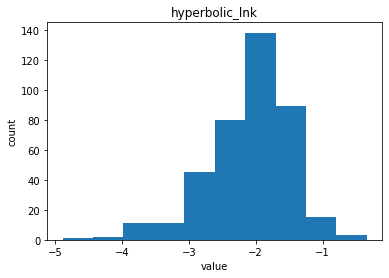

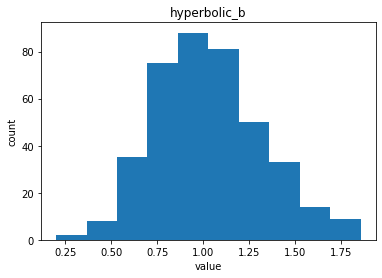

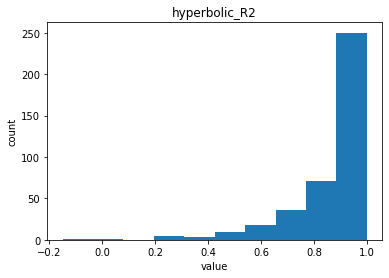

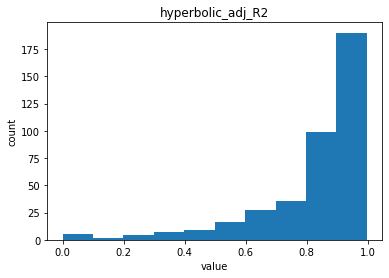

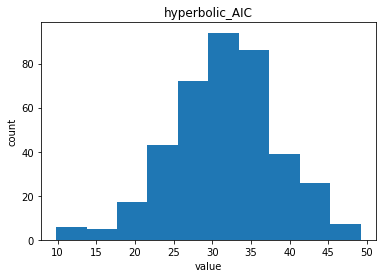

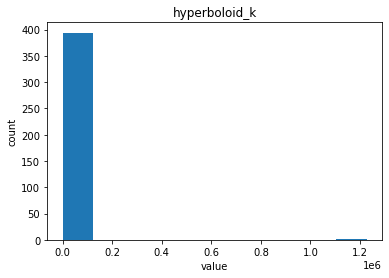

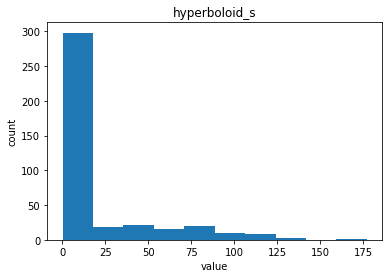

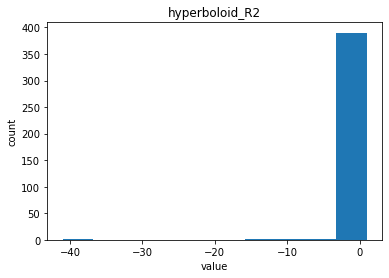

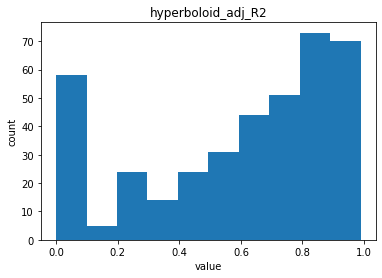

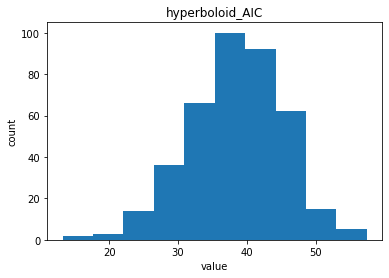

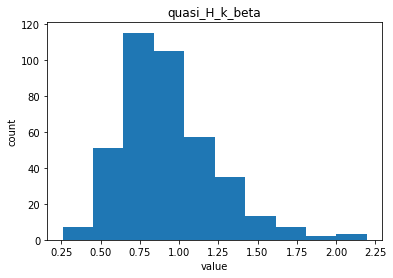

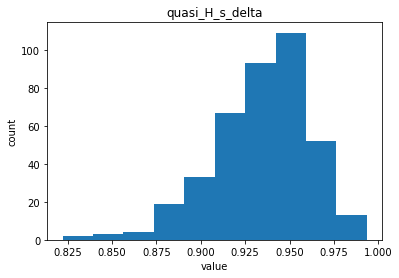

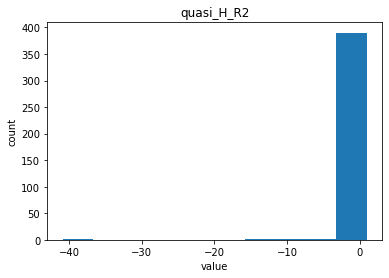

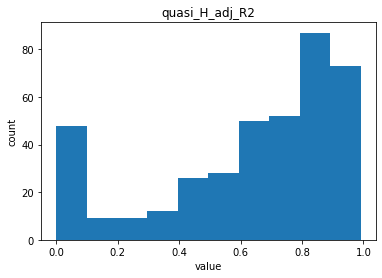

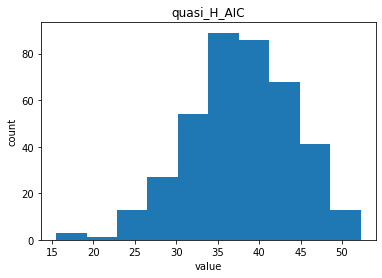

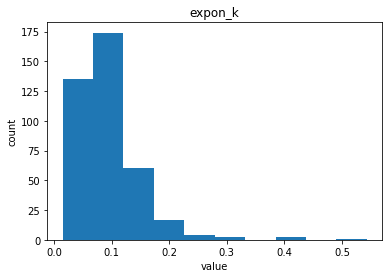

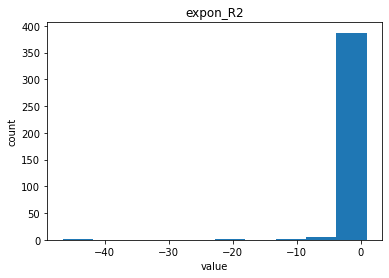

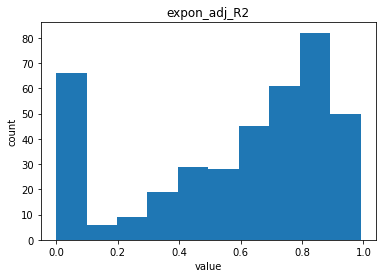

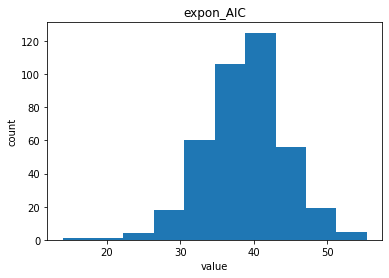

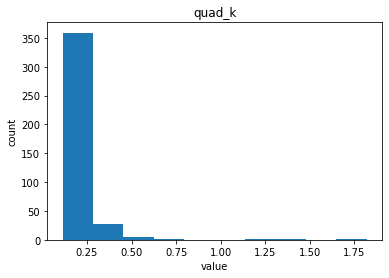

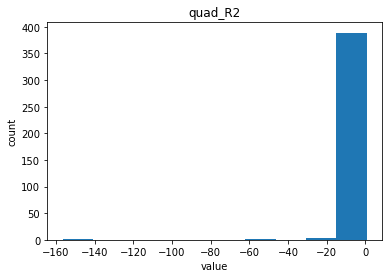

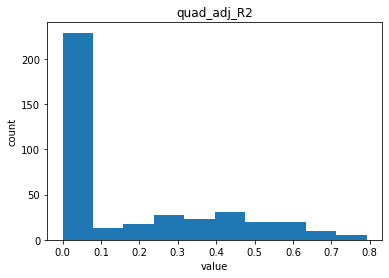

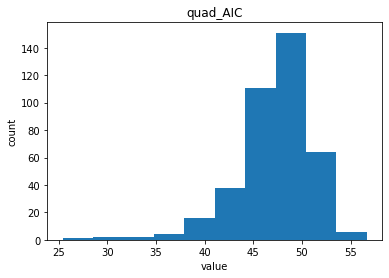

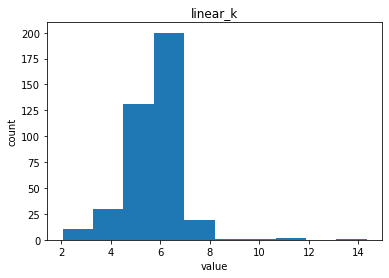

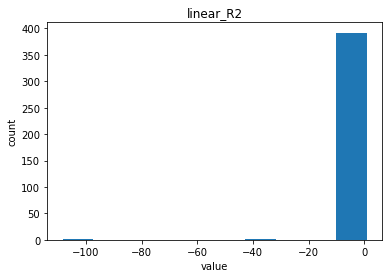

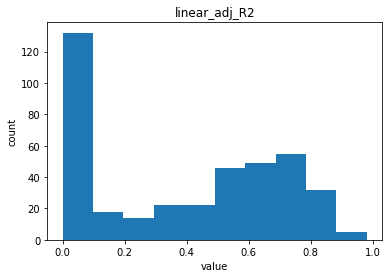

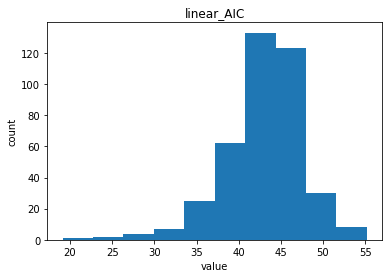

In [10]:
graph_columns = ['missing_indiff_point','missing_indiff_count','indiff_0','indiff_4',
                 'indiff_8','hyperbolic_k','hyperbolic_lnk','hyperbolic_b',
                 'hyperbolic_R2','hyperbolic_adj_R2','hyperbolic_AIC',
                 'hyperboloid_k','hyperboloid_s','hyperboloid_R2','hyperboloid_adj_R2','hyperboloid_AIC',
                 'quasi_H_k_beta','quasi_H_s_delta','quasi_H_R2','quasi_H_adj_R2','quasi_H_AIC',
                 'expon_k','expon_R2','expon_adj_R2','expon_AIC','quad_k','quad_R2','quad_adj_R2',
                 'quad_AIC','linear_k','linear_R2','linear_adj_R2','linear_AIC']
#removed following object_columns for graphing
#object_columns = ['indiff_2','indiff_16','indiff_24','AUC_traditional','AUC_normal']
#for col in object_columns:
#    fits[col] = pd.to_numeric(fits[col], downcast="float")
for col in graph_columns:
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.hist(fits[col])
    plt.show() 



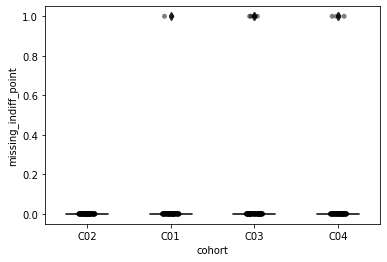

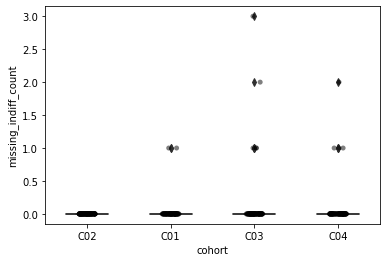

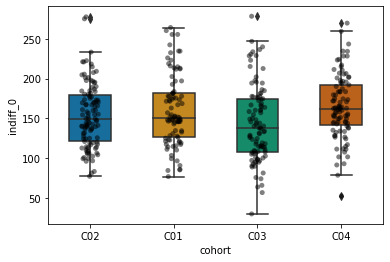

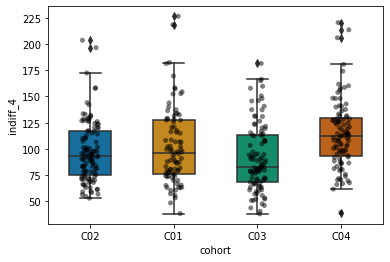

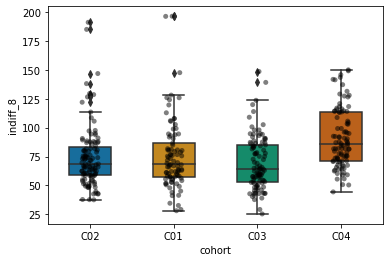

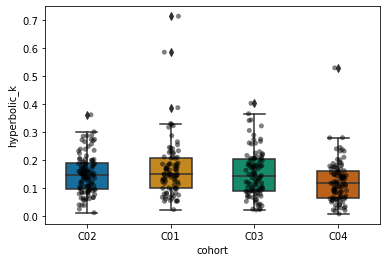

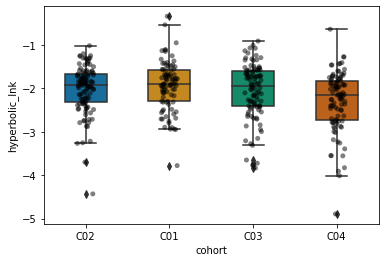

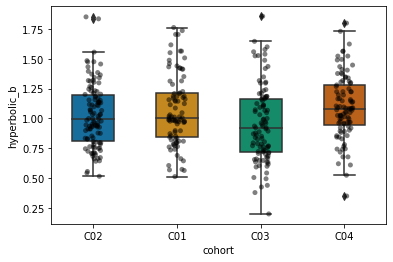

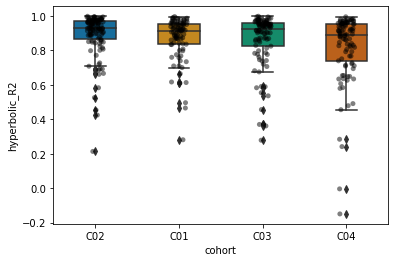

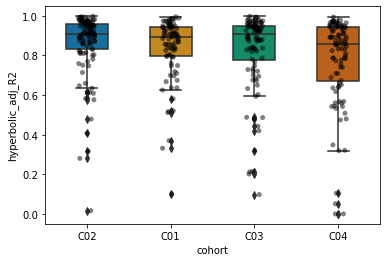

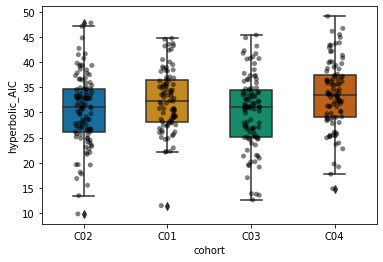

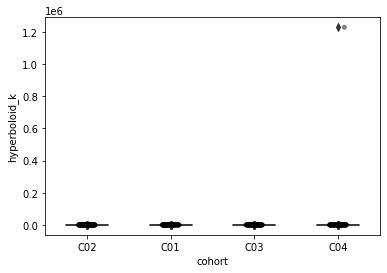

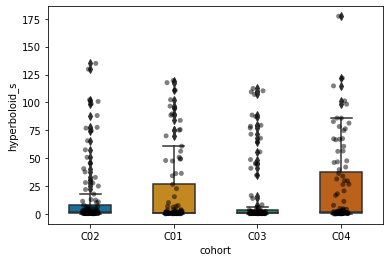

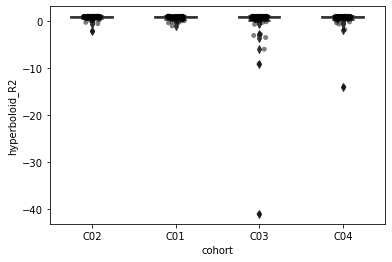

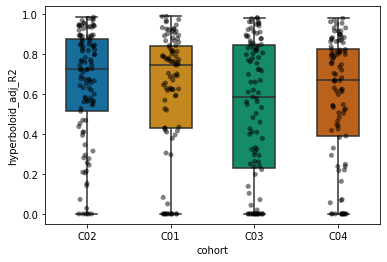

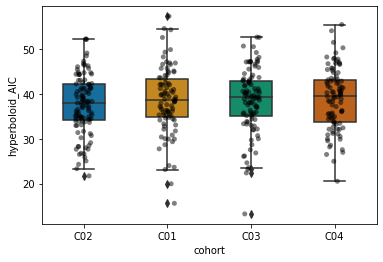

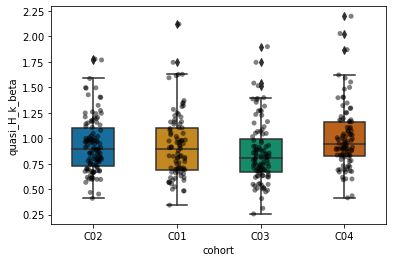

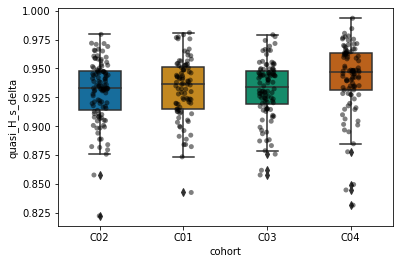

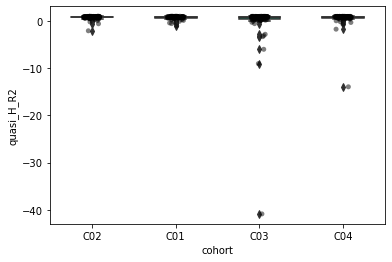

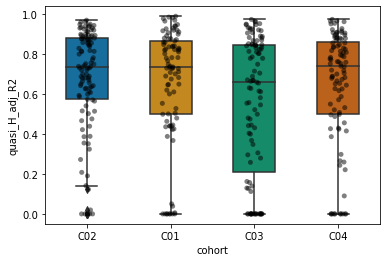

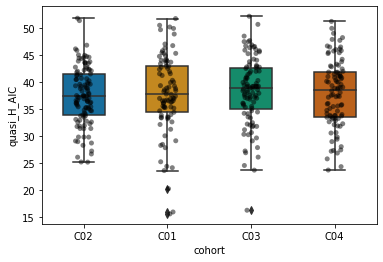

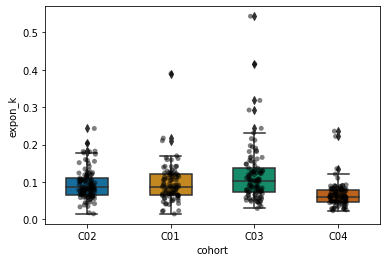

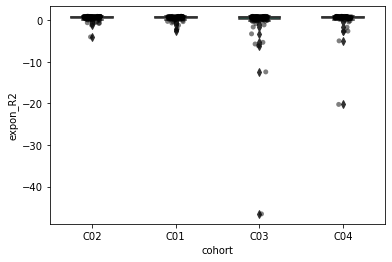

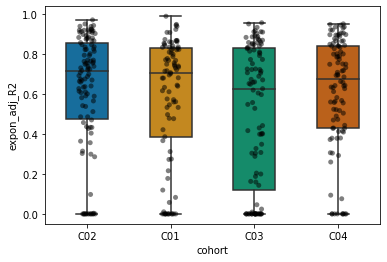

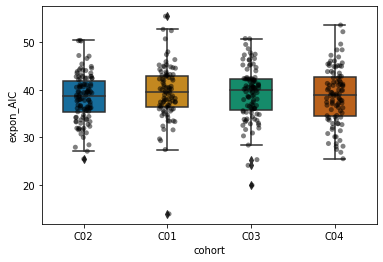

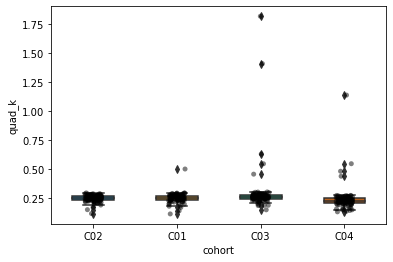

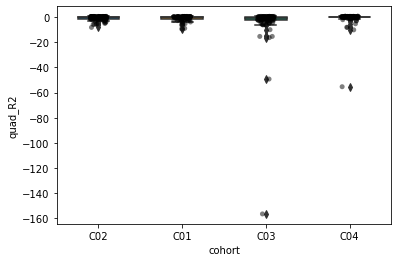

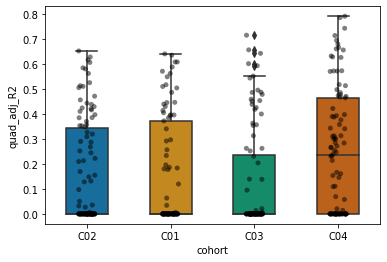

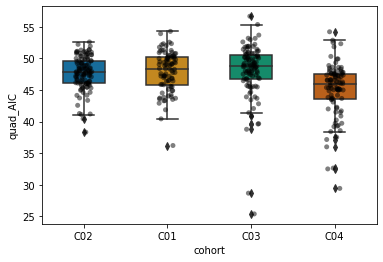

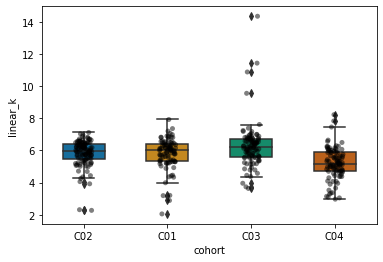

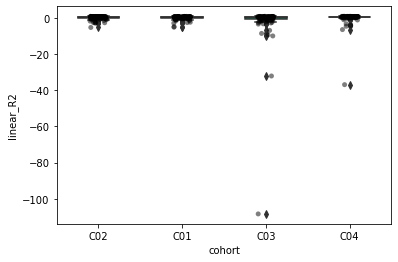

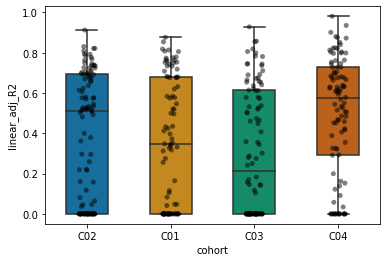

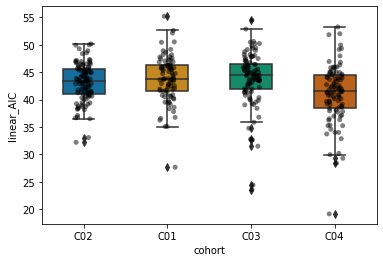

In [11]:
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = fits, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=fits, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()
#fits.dtypes
#fits.AUC_traditional.unique()

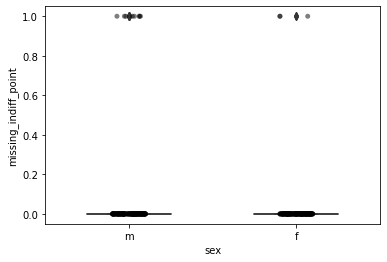

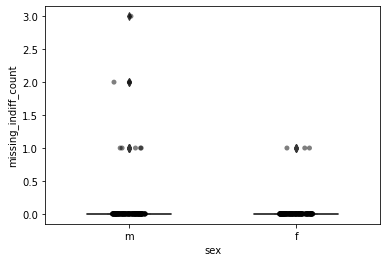

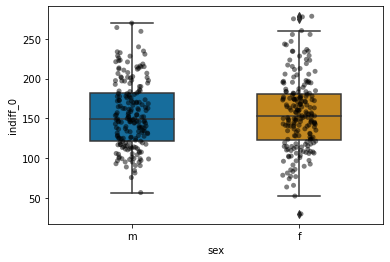

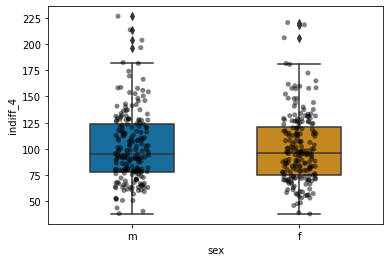

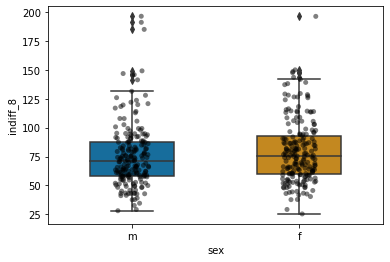

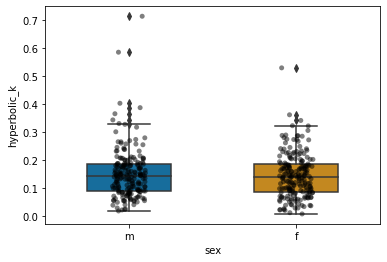

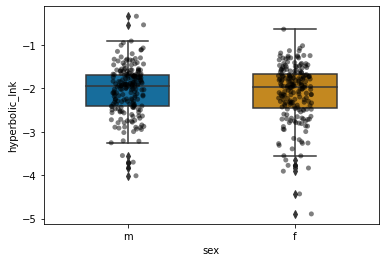

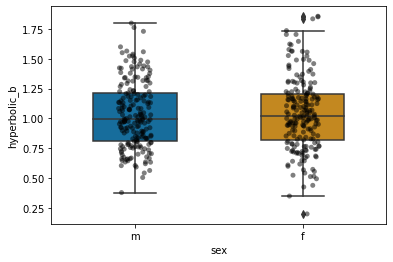

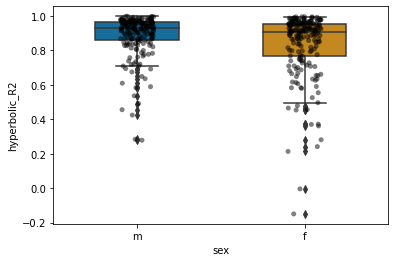

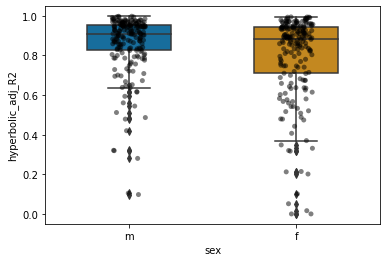

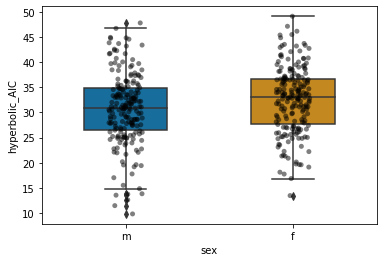

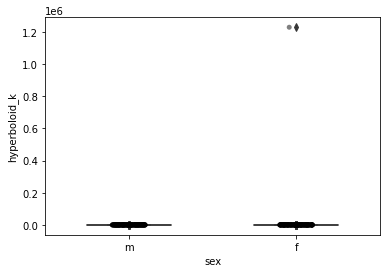

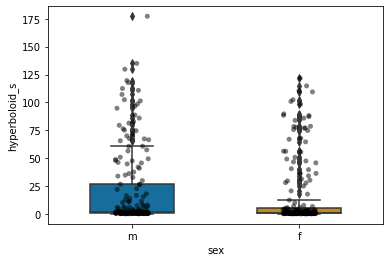

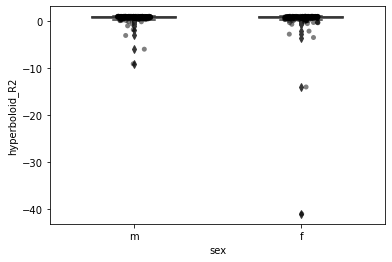

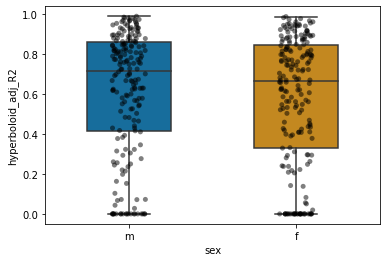

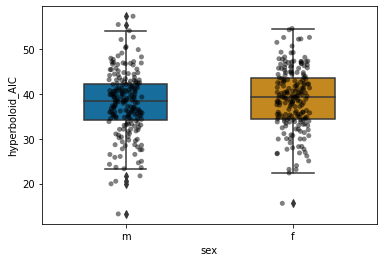

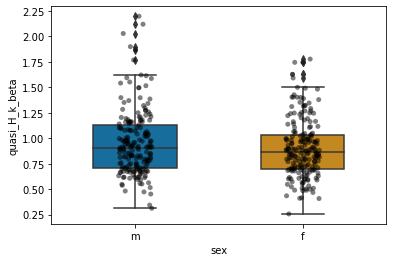

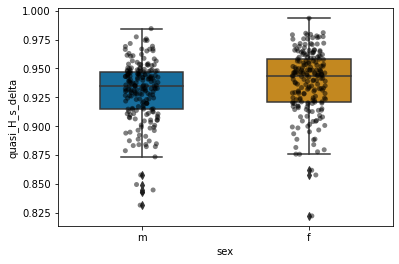

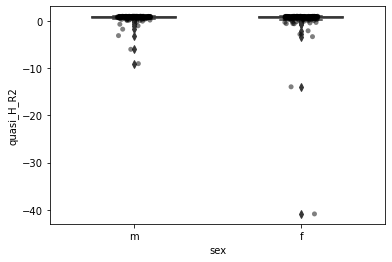

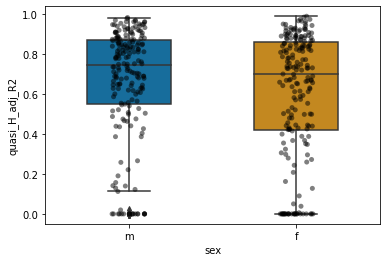

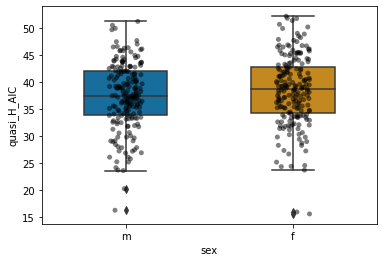

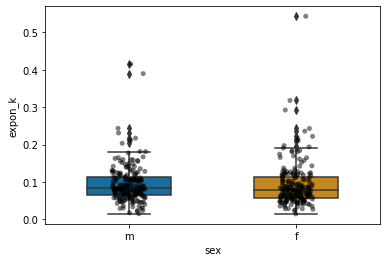

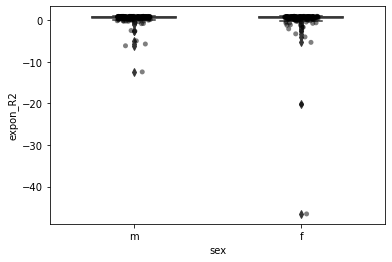

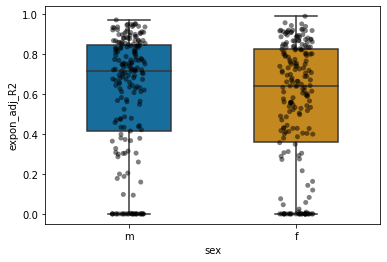

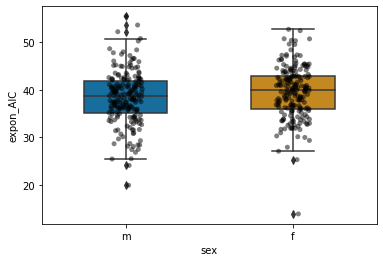

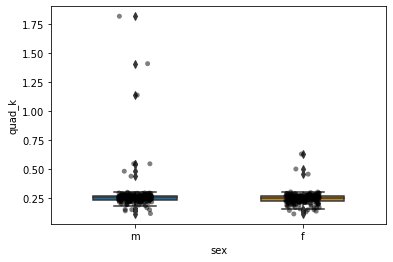

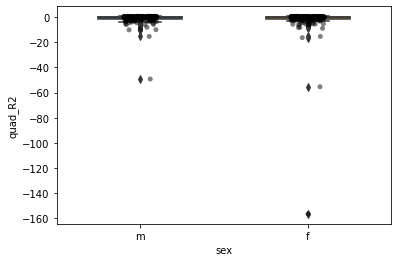

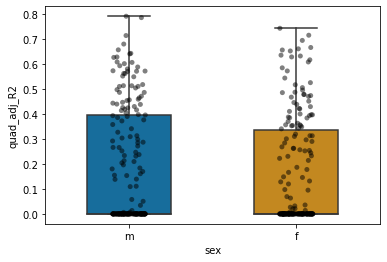

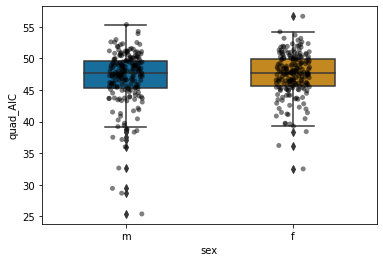

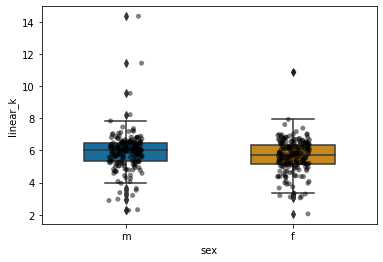

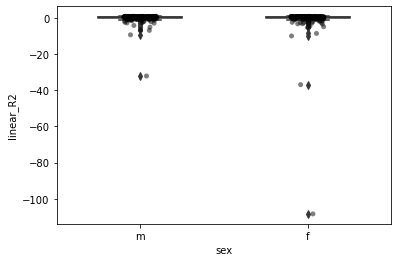

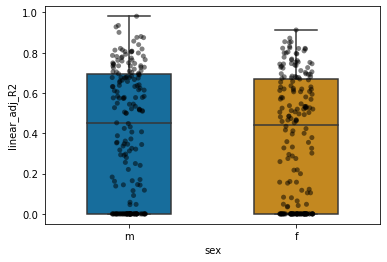

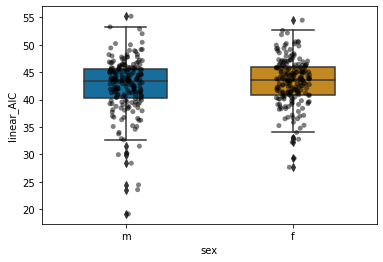

In [12]:
for col in graph_columns:
    sns.boxplot(y = col, x ='sex', 
                     data = fits, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=fits, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()